# Assignment 5
## Terry Luedtke
## epf7ch@virginia.edu

### Do all four questions.

In [1]:
DEBUG = False

### Q1

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])
e_1,e_2,e_3

(array([1, 0, 0]), array([0, 1, 0]), array([0, 0, 1]))

In [4]:
ae_1 = A@e_1
ae_2 = A@e_2
ae_3 = A@e_3
ae_1, ae_2, ae_3

(array([1, 4, 7]), array([2, 5, 8]), array([3, 6, 9]))

Matrix multiplying a matrix by a vector with a value of 1 in a single location and zeros otherwise is similar to the identity matrix. The result will be a copy of the column in the matrix corresponding to the index of the 1 in the vector. This is similar to splitting the array:

In [5]:
np.hsplit(A, len(A))

[array([[1],
        [4],
        [7]]),
 array([[2],
        [5],
        [8]]),
 array([[3],
        [6],
        [9]])]

However, Numpy matmul has special handling for vectors to ensure correct matrix multipication. From the docs:

> If the second argument is 1-D, it is promoted to a matrix by appending a 1 to its dimensions. After matrix multiplication the appended 1 is removed. 


Whis is why the results are vectors, not arrays. We can show similar behavior by reshaping the vectors into vertical matrices and then multiplying. Note how the result below looks similar to the first element in the hsplit.

In [6]:
et_1=e_1.reshape((3,1))
print(repr(et_1))
aet_1 = A@et_1
aet_1

array([[1],
       [0],
       [0]])


array([[1],
       [4],
       [7]])

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [7]:
u = np.ones(3)
A@u

array([ 6., 15., 24.])

The result is the sum of each row in the matrix (reverted back to a vector as explained above).

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [8]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])
A@x

array([-2,  4, 11])

The identity matrix returns the existing vector unchanged. The vector is actually [(-2 * 1 + 4 * 0 + 11 * 0), (-2 * 0 + 4 * 1 + 11 * 0), (-2 * 0 + 4 * 0 + 11 * 1)]. Note how the zeros remove the remaining elements so just the original value is returned. 

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [9]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])
A@x


array([11, -2,  4])

The matrix rearranges the elements of the vector but keeps the original values.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [10]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [11]:
ae_1 = A@e_1
ae_2 = A@e_2
ae_3 = A@e_3
ae_1, ae_2, ae_3

(array([0.50052958, 0.02574731, 0.47372311]),
 array([0.24049286, 0.39251588, 0.36699127]),
 array([0.18358131, 0.37907577, 0.43734292]))

The outcome resulted in three vectors with the probabilities from the original marix A.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [12]:
for e in [e_1, e_2, e_3]:
    z = e
    for _ in range(7):
        z = A@z
        print("z = ", z, sum(z))
    print()


z =  [0.50052958 0.02574731 0.47372311] 1.0
z =  [0.34368862 0.20257047 0.45374091] 1.0
z =  [0.30404142 0.26036337 0.43559521] 1.0
z =  [0.29476439 0.27514859 0.43008701] 1.0
z =  [0.29266551 0.27862515 0.42870935] 1.0
z =  [0.29219812 0.27941347 0.42838841] 1.0
z =  [0.29209485 0.2795892  0.42831594] 1.0

z =  [0.24049286 0.39251588 0.36699127] 0.9999999999999999
z =  [0.28214379 0.29937825 0.41847795] 0.9999999999999999
z =  [0.29004438 0.28341002 0.42654561] 1.0
z =  [0.29163968 0.2804039  0.42795643] 1.0
z =  [0.29197422 0.27979983 0.42822595] 1.0
z =  [0.29204588 0.27967351 0.42828062] 1.0
z =  [0.2920614  0.27964649 0.42829211] 1.0

z =  [0.18358131 0.37907577 0.43734292] 1.0
z =  [0.26334088 0.31930609 0.41735304] 1.0
z =  [0.28521895 0.29032145 0.4244596 ] 1.0
z =  [0.29050361 0.28220175 0.42729464] 1.0
z =  [0.29171646 0.2802254  0.42805814] 1.0
z =  [0.2919884 0.2797703 0.4282413] 1.0
z =  [0.29204869 0.2796681  0.42828321] 1.0



The elements of each row maintain the sum of 1, i.e. they perserve the probability property. All three sets appear to be converging to something near [0.292 0.280 0.428].

### Q2

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [13]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])
ic = [1,0]

Since the vector is to the left of the matrix, the result will extract a row rather than a column.

> [.25 * 1 + .5 * 0, .75 * 1 + .5 * 0] = [.25 .75]

This represents the probabilities that states 1 will transition into either 1 or 2 in the first period.

In [14]:
state = T@ic
state, sum(state)

(array([0.25, 0.75]), np.float64(1.0))

Multiplying again generates the probabilities for the second period.

In [15]:
state = state@T
state

array([0.625, 0.5  ])

Repeated multiplication by T appears to settle down towards [0.4 0.6].

In [16]:
state = ic
for _ in range(7):
    state = T@state
    print(state)
    print(sum(state))
    print()

[0.25 0.75]
1.0

[0.4375 0.5625]
1.0

[0.390625 0.609375]
1.0

[0.40234375 0.59765625]
1.0

[0.39941406 0.60058594]
1.0

[0.40014648 0.59985352]
1.0

[0.39996338 0.60003662]
1.0



For transitions to state 2, the values are oscillating towards .4 and .6, which preserves probability (0.4 + 0.6 = 1).

In [17]:
state = [0, 1]
for _ in range(7):
    state = T@state
    print(state)
    print(sum(state))
    print()

[0.5 0.5]
1.0

[0.375 0.625]
1.0

[0.40625 0.59375]
1.0

[0.3984375 0.6015625]
1.0

[0.40039062 0.59960938]
1.0

[0.39990234 0.60009766]
1.0

[0.40002441 0.59997559]
1.0



### Q3

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [18]:
import pandas as pd

cw = pd.read_csv('cville_weather.csv')
cw

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-27,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
407,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-28,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
408,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-29,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
409,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-30,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


The precipitation (PRCP) column is missing data when the totals are instead included in a multi-day precipitation total (MDPR). MDPR is the sum of rain over X number of days, where X is represented in the DAPR column. The description isn't clear as to whether all days covered by MDPR had precipitation (though considering that 34 days are covered by the MPDR reported on 2024-11-07, probably not). Even accounting for DAPR/MDPR, there are dates missing, for example 2024-03-08. 

In [19]:
cw['rain'] = cw['PRCP']>0
cw

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,rain
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN,True
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN,True
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN,True
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN,True
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-27,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,False
407,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-28,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,False
408,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-29,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,False
409,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-30,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,False


Run through the rain column and determine probability of each transition ($R\leftarrow R$, $R\leftarrow C$, $C\leftarrow R$, $C\leftarrow C$).

In [20]:
days = cw.value_counts('rain')
rainydays = days[True]
cleardays = days[False]
rainydays, cleardays

(np.int64(179), np.int64(232))

In [21]:
transitions = {'R2R':0, 'R2C':0, 'C2R':0, 'C2C':0}

for i in range(len(cw)-1):
    if cw['rain'].iloc[i] and cw['rain'].iloc[i+1]:
        transitions['R2R'] += 1
    elif cw['rain'].iloc[i] and not cw['rain'].iloc[i+1]:
        transitions['R2C'] += 1
    elif not cw['rain'].iloc[i] and cw['rain'].iloc[i+1]:
        transitions['C2R'] += 1
    elif not cw['rain'].iloc[i] and not cw['rain'].iloc[i+1]:
        transitions['C2C'] += 1
print(transitions)

rainydays = transitions['R2R'] + transitions['R2C']
cleardays = transitions['C2R'] + transitions['C2C']
rainydays, cleardays

precipT = np.array([[transitions['R2R']/(rainydays), transitions['C2R']/(cleardays)],
                    [transitions['R2C']/(rainydays), transitions['C2C']/(cleardays)]])
precipT

{'R2R': 116, 'R2C': 63, 'C2R': 62, 'C2C': 169}


array([[0.64804469, 0.26839827],
       [0.35195531, 0.73160173]])

In [22]:
# Validate reservation of probability = 100%
r=precipT@[1,0]
c=precipT@[0,1]
r.sum(),c.sum()

(np.float64(1.0), np.float64(1.0))

So our transition matrix
$$
T = \left[ \begin{array}{cc} p_{R\leftarrow R} &  p_{R\leftarrow C} \\
p_{C \leftarrow R} & p_{C \leftarrow C} \end{array}\right] \\
= \left[ \begin{array}{cc} 0.64804469 & 0.26839827 \\
0.35195531 & 0.73160173 \end{array}\right]
$$

So, starting from a clear day, the weekly forecast is:

In [23]:
state = [0, 1]
for _ in range(7):
    state = precipT@state
    print(state)
    print(sum(state))
    print()

[0.26839827 0.73160173]
1.0

[0.37029471 0.62970529]
1.0

[0.40897933 0.59102067]
1.0

[0.42366581 0.57633419]
1.0

[0.42924148 0.57075852]
1.0

[0.43135826 0.56864174]
1.0

[0.43216189 0.56783811]
1.0



And, the weekly forecast from a rainy day is:

In [24]:
state = [1,0]
for _ in range(7):
    state = precipT@state
    print(state)
    print(sum(state))
    print()

[0.64804469 0.35195531]
1.0

[0.51442612 0.48557388]
1.0

[0.4636983 0.5363017]
1.0

[0.44443967 0.55556033]
1.0

[0.4371282 0.5628718]
1.0

[0.43435243 0.56564757]
1.0

[0.43329861 0.56670139]
1.0



It looks like Charlottesville trends towards dry days!

### Q4

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [25]:
import pickle
with open('taxicab.pkl', 'rb') as f:
    taxis = pickle.loads(f.read())


In [26]:
len(taxis)

1000

In [35]:
# Taxis is a list of Pandas series. Each series is a list of locations visited by a single taxi.
# Load transition data for all taxis (series in the list)

if DEBUG:
    taxiLimit = 10
else:
    taxiLimit = len(taxis)

transitions = {}
locations = {}

def increment(data, key):
    if key in data:
        data[key] += 1
    else:
        data[key] = 1
    
for t in taxis[:taxiLimit]:  
    print(f".", end="")
    for i, origin in enumerate(t.iloc[0:-1]):
        increment(locations, origin)
        destination = t.iloc[i+1]
        #print(f"from {origin} to {destination}")
        if origin not in transitions:
            transitions[origin] = {}
        if destination not in transitions[origin]:
            transitions[origin][destination] = 0
        transitions[origin][destination] += 1
    increment(locations, t.iloc[-1]) # add last location
print()

#transitions
        

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [36]:
sorted(locations.items(), key=lambda item: item[1])

[('Liberty Island', 1),
 ('Ellis Island', 3),
 ('Governors Island', 12),
 ('Marble Hill', 493),
 ("Randall's Island", 3603),
 ('Roosevelt Island', 8010),
 ('Two Bridges', 10388),
 ('Inwood', 14312),
 ('Little Italy', 38592),
 ('Civic Center', 57913),
 ('Washington Heights', 72532),
 ('Chinatown', 105877),
 ('Nolita', 106385),
 ('Stuyvesant Town', 111289),
 ('Morningside Heights', 162715),
 ('NoHo', 174325),
 ('Harlem', 217171),
 ('Battery Park City', 229237),
 ('East Harlem', 316858),
 ('Central Park', 370146),
 ('Lower East Side', 370599),
 ('Flatiron District', 395298),
 ('Tribeca', 408651),
 ('Financial District', 441596),
 ('Gramercy', 501768),
 ('Kips Bay', 507805),
 ('Greenwich Village', 510286),
 ('SoHo', 550614),
 ('Murray Hill', 654423),
 ('West Village', 839399),
 ('Theater District', 874063),
 ('East Village', 888692),
 ("Hell's Kitchen", 1224396),
 ('Upper West Side', 1803560),
 ('Chelsea', 1978352),
 ('Outside Manhattan', 2364156),
 ('Upper East Side', 2797805),
 ('Midtown

In [28]:
locList = list(locations)
locList.sort()
taxiT = pd.DataFrame(index=locList, columns=locList)

for origin, destinations in transitions.items():
    for destination, count in destinations.items():
        print(origin, destination, count)
        taxiT.loc[destination, origin] = count
taxiT.fillna(0, inplace=True)
taxiT

Outside Manhattan Outside Manhattan 1203902
Outside Manhattan Central Park 11370
Outside Manhattan Lower East Side 86647
Outside Manhattan Midtown 191261
Outside Manhattan Murray Hill 34612
Outside Manhattan SoHo 42249
Outside Manhattan West Village 33856
Outside Manhattan Financial District 39116
Outside Manhattan Upper West Side 58410
Outside Manhattan Hell's Kitchen 46402
Outside Manhattan Harlem 17790
Outside Manhattan Gramercy 24846
Outside Manhattan Upper East Side 152788
Outside Manhattan Washington Heights 6171
Outside Manhattan Theater District 45978
Outside Manhattan East Village 77743
Outside Manhattan Chelsea 60075
Outside Manhattan Kips Bay 24146
Outside Manhattan Stuyvesant Town 7312
Outside Manhattan Little Italy 9097
Outside Manhattan NoHo 12603
Outside Manhattan Nolita 14763
Outside Manhattan Flatiron District 12011
Outside Manhattan Greenwich Village 22673
Outside Manhattan Chinatown 19814
Outside Manhattan Tribeca 39108
Outside Manhattan East Harlem 25944
Outside Man

/var/folders/th/tcrg5hgd1ks0r8v5s6p0sgqw0000gn/T/ipykernel_55806/2056368496.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  taxiT.fillna(0, inplace=True)


,Battery Park City,Central Park,Chelsea,Chinatown,Civic Center,East Harlem,East Village,Ellis Island,Financial District,Flatiron District,...,Roosevelt Island,SoHo,Stuyvesant Town,Theater District,Tribeca,Two Bridges,Upper East Side,Upper West Side,Washington Heights,West Village
Battery Park City,60093,1005,16420,1323,1380,473,4564,0,19496,2617,...,15,8500,556,5613,21977,184,7035,5387,142,12561
Central Park,605,52268,10958,251,139,17939,2601,0,1277,1862,...,56,1752,354,15680,1161,25,92319,60984,776,3028
Chelsea,16214,11705,662397,4837,2917,6406,58840,0,22060,60679,...,212,46993,7721,74296,31034,320,72017,66146,2489,123919
Chinatown,1568,296,5098,13980,1915,269,6652,0,8442,1086,...,12,5177,463,1644,4289,767,2634,1294,82,3437
Civic Center,949,149,2911,2644,5493,171,2034,0,3614,667,...,6,3280,174,870,4189,225,1983,774,53,1701
East Harlem,427,6726,7742,346,209,71922,4643,0,1308,1472,...,91,1295,720,4937,842,53,89788,26064,1627,2328
East Village,4568,2368,52599,8575,2599,4039,237311,0,17874,15545,...,179,27374,11325,11267,11940,675,37969,12250,647,32836
Ellis Island,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Financial District,20958,1598,22371,6138,6285,1271,14688,0,136147,4636,...,43,14655,2043,10065,20714,2233,17635,6079,201,14299
Flatiron District,2346,2445,59080,789,620,1494,15674,0,3892,62572,...,57,8893,2771,8858,5308,67,19546,8863,215,17709


In [29]:
#  Convert to probabilities
taxiT = taxiT/taxiT.sum()
taxiT.sum()

Battery Park City      1.0
Central Park           1.0
Chelsea                1.0
Chinatown              1.0
Civic Center           1.0
East Harlem            1.0
East Village           1.0
Ellis Island           1.0
Financial District     1.0
Flatiron District      1.0
Governors Island       1.0
Gramercy               1.0
Greenwich Village      1.0
Harlem                 1.0
Hell's Kitchen         1.0
Inwood                 1.0
Kips Bay               1.0
Liberty Island         1.0
Little Italy           1.0
Lower East Side        1.0
Marble Hill            1.0
Midtown                1.0
Morningside Heights    1.0
Murray Hill            1.0
NoHo                   1.0
Nolita                 1.0
Outside Manhattan      1.0
Randall's Island       1.0
Roosevelt Island       1.0
SoHo                   1.0
Stuyvesant Town        1.0
Theater District       1.0
Tribeca                1.0
Two Bridges            1.0
Upper East Side        1.0
Upper West Side        1.0
Washington Heights     1.0
W

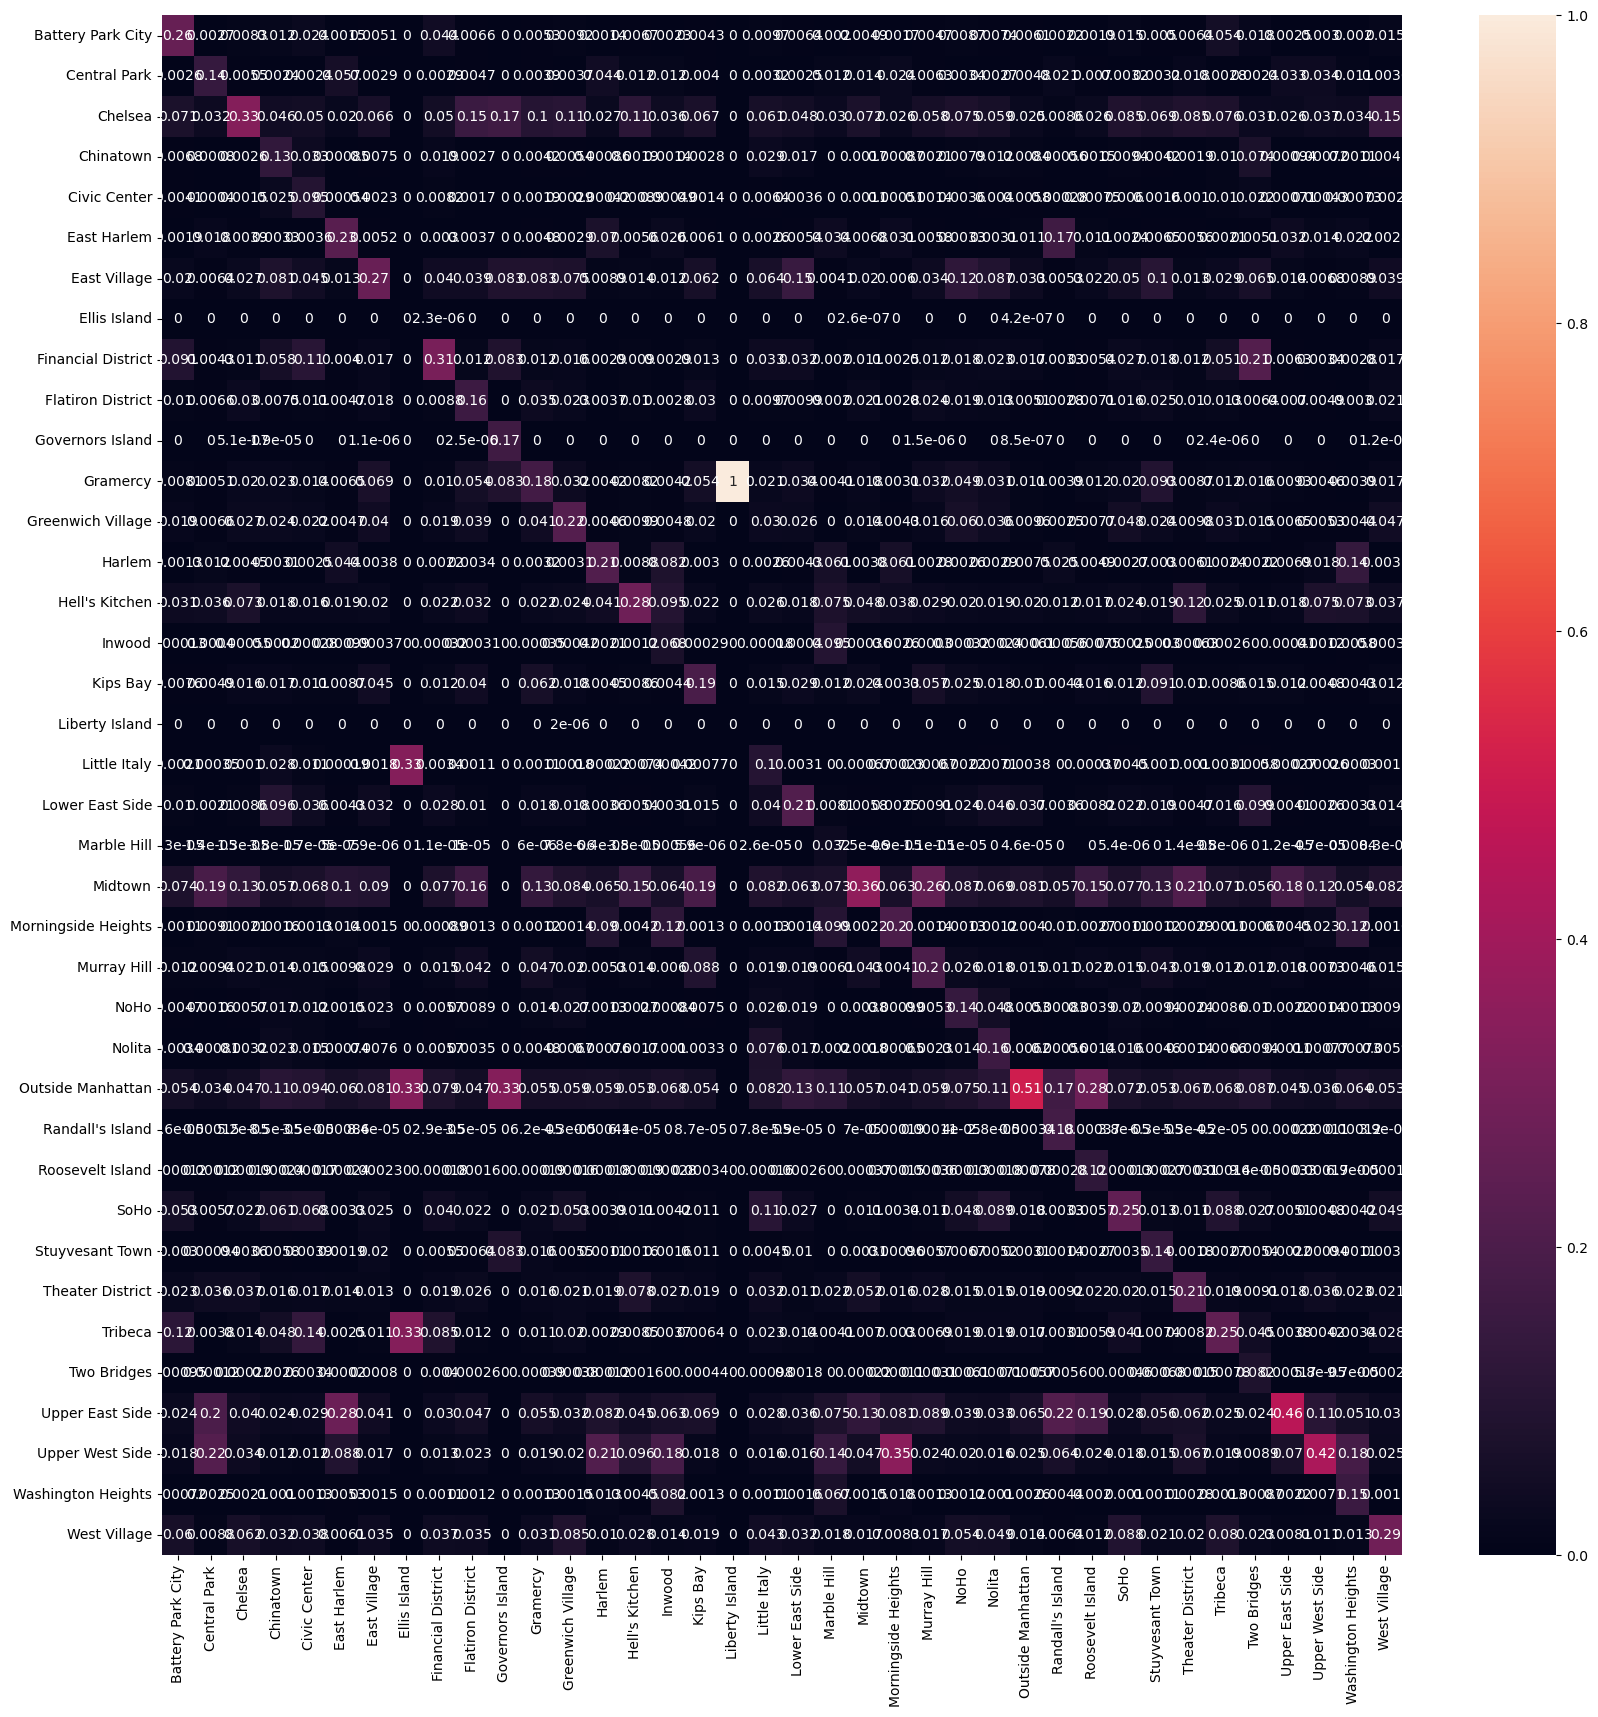

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(taxiT, annot=True)
plt.show()

ToDo: Should we remove Liberty, Ellis and Governors Islands, since they are accessibley only by ferry (how did they wind up in taxi DB!)? Note, if you do, the probabilities need to be recalculated to ensure they equal 1.

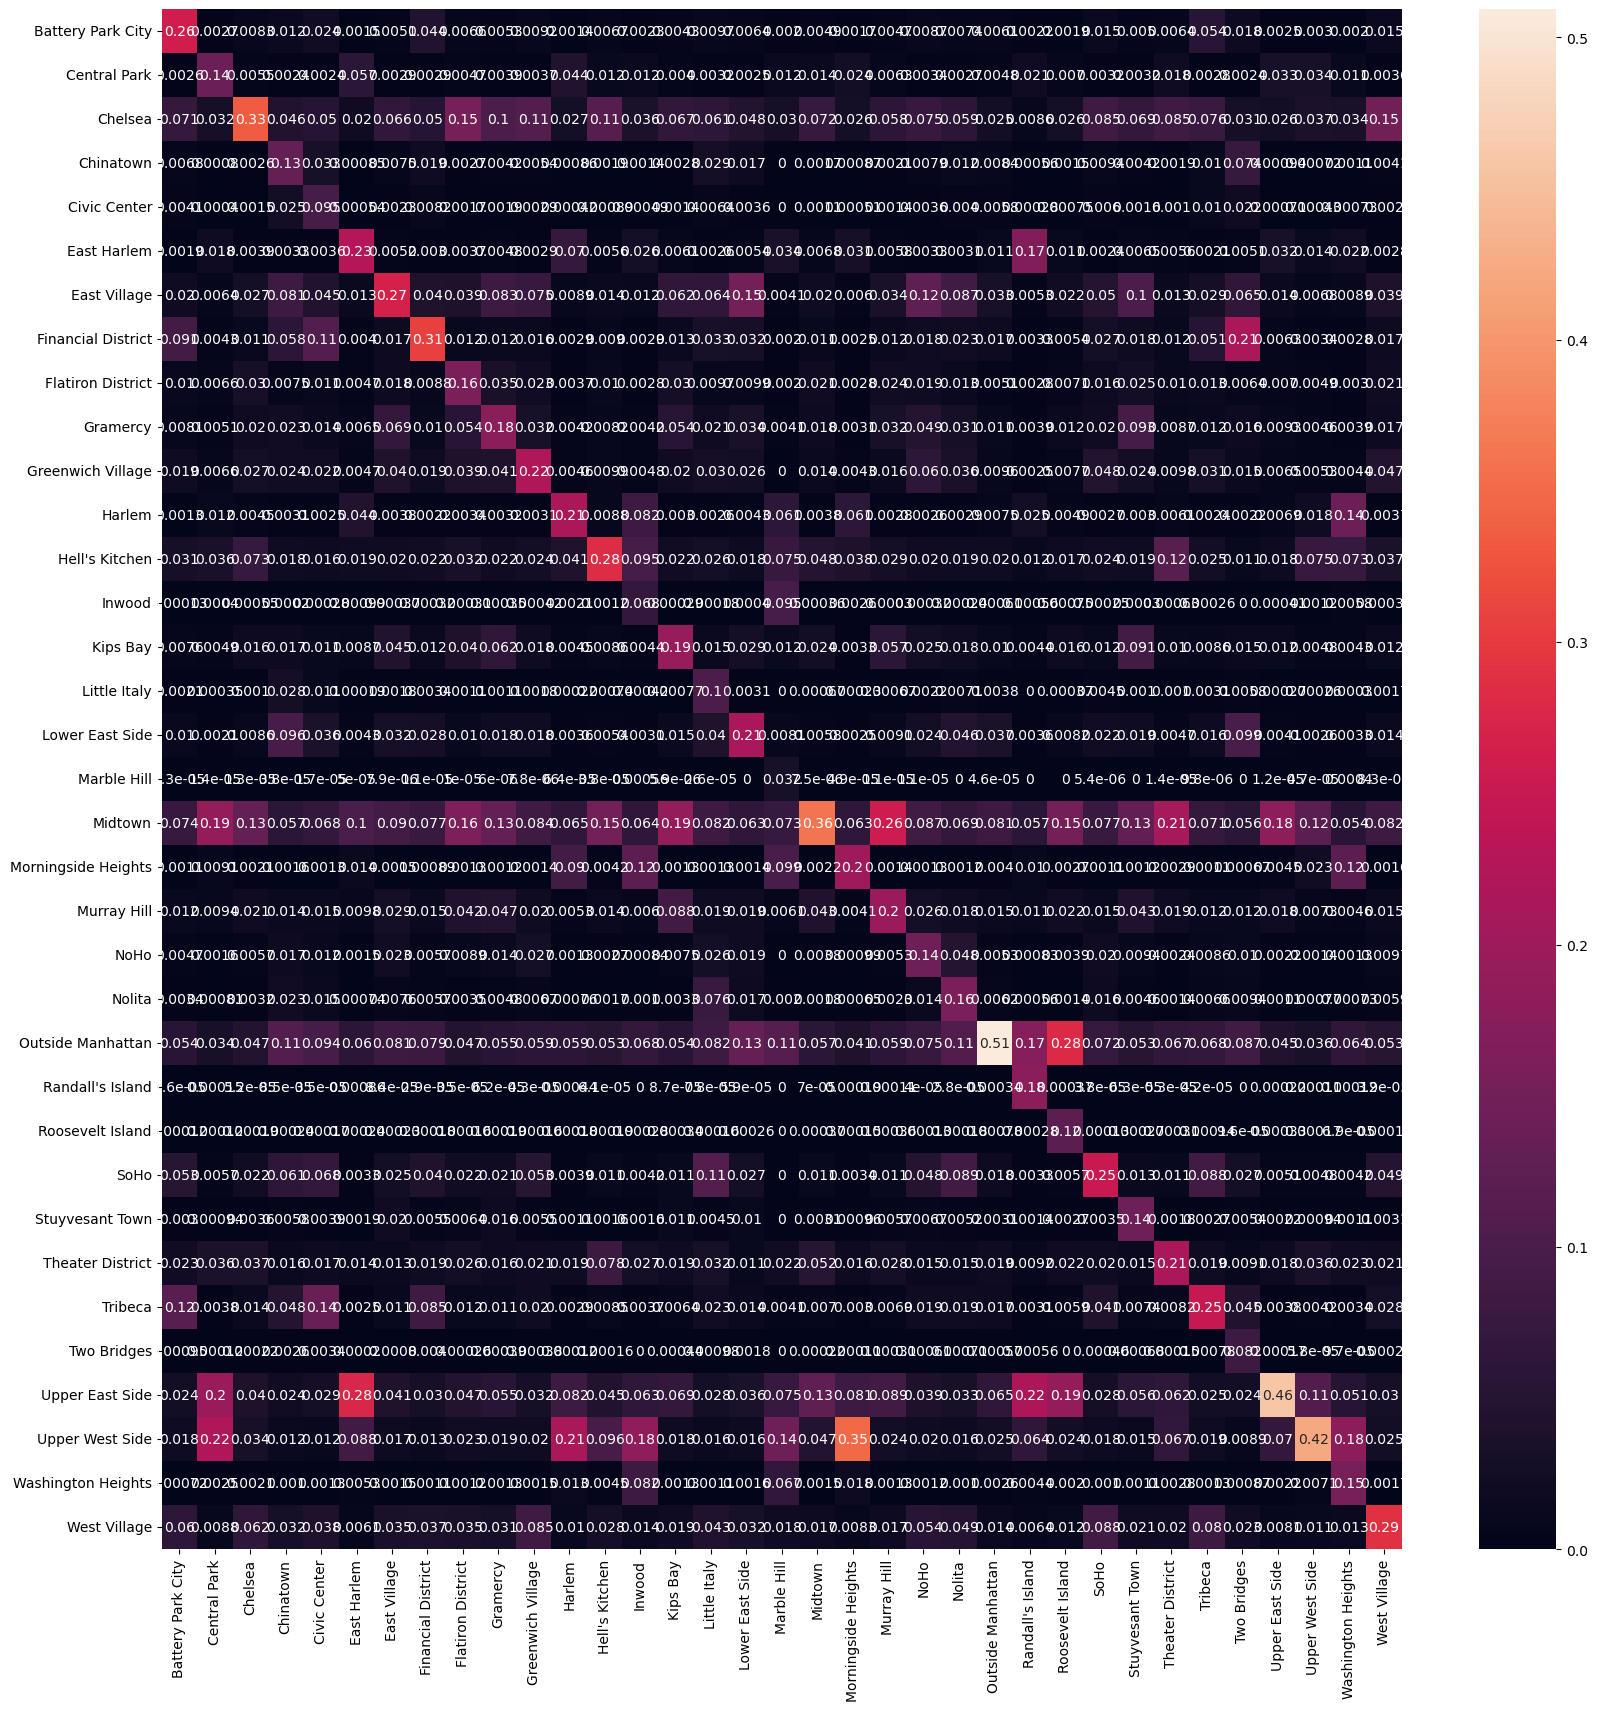

In [31]:
unreachable = ["Liberty Island", "Ellis Island", "Governors Island"]
for u in unreachable:
    taxiT.drop(u, axis=0, inplace=True)
    taxiT.drop(u, axis=1, inplace=True)

plt.figure(figsize=(20, 20))
sns.heatmap(taxiT, annot=True)
plt.show()